## Part 0: Reading the data

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Please find the data (test_DataScience.xlsx) and take it as the input ( as data frame ).
df = pd.read_excel("/content/test_DataScience.xlsx")
df.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [ ]:
# Print all the column names and the data types in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [ ]:
# Print the cities of India from which the page was accessed.
print("Cities of India from which the page was accessed : ")
for i in df['Place_in_India'].unique():
    print(i)

Cities of India from which the page was accessed : 
Bengaluru
Hyderabad
Dehradun
Indore
Pune


###  Information
- The given dataset belongs to the different cities of India
- It is from year 2020 -2022
- It gives information of costumer visited from different plotform 
- It gives information of how costumer knows of this website
- Level 1, 2, 3, 4 may be giving information about on what time and year customer will visit the website

## Part 1: Data cleaning

In [ ]:
def data_cleaning(df):
    #Create a new column, called ‘Month_Year’, using lambda function. The new column should be at the 3rd position from the start in the given dataset & its values should be : ’01-01-2020’ for January, 2020 and ’01-02-2020’ for February 2020 and so on.
    df['Month_Year'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df.Year, df.Month)])
    df = df [['Year', 'Month','Month_Year', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from','Place_in_India', 'Level 1', 'Level 2', 'Level 3', 'Level 4']]
    #Replaces the null values with the average of the respective column in the data.
    df['Level 1'] = df['Level 1'].fillna(df['Level 1'].mean())
    df['Level 2'] = df['Level 2'].fillna(df['Level 2'].mean())
    #In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on.
    df['B'] = df['Month'].map({'Jan':1,'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,'Oct':10, 'Nov':11, 'Dec':12})
    #In column ‘E’ Replace “Came_From_LinkedIn” with “LinkedIn” and “Landed_Directly” with “Direct_traffic” .
    df['E'] = ['LinkedIn' if (i == 'Came_From_LinkedIn') else   'Direct_traffic' if (i == 'Landed_Directly') else i for i in df['Coming from']]
    return df
data_cleaning(df)

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,B,E
0,2020,Jan,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,1,LinkedIn
1,2020,Jan,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,1,LinkedIn
2,2020,Jan,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,1,LinkedIn
3,2020,Jan,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,783870.222017,358215.416281,320923,110667,1,LinkedIn
4,2020,Jan,2020-01-01,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,783870.222017,358215.416281,220937,46033,1,LinkedIn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,Dec,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882,12,Unidentified_Sources
2156,2022,Dec,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703,12,Unidentified_Sources
2157,2022,Dec,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089,12,Unidentified_Sources
2158,2022,Dec,2022-12-01,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465,12,Unidentified_Sources


## Part 2: Descriptive statistics

In [ ]:
def descriptive_stats(dataset,year=2020, month="Jan", laptop_desktop="Desktop_Website", customer_type="Existing_Customer", coming_from="Came_From_LinkedIn", place_in_India="Bengaluru"):
    #filter data according to parameters 
    filtering_criteria = (dataset["Year"] == year) & (dataset["Month"] == month) & (dataset["Laptop/Desktop"] == laptop_desktop) & (dataset["Coming from"] == coming_from) & (dataset["Type_of_Customers?"] == customer_type) & (dataset["Place_in_India"] == place_in_India)
    #createing new dataframe as df
    df = dataset.loc[filtering_criteria]
    print("   ***Filter the dataframe***   ")
    print(df)
print(descriptive_stats(df))

   ***Filter the dataframe***   
   Year Month   Laptop/Desktop Type_of_Customers?         Coming from  \
0  2020   Jan  Desktop_Website  Existing_Customer  Came_From_LinkedIn   

  Place_in_India  Level 1  Level 2  Level 3  Level 4 Month_Year  
0      Bengaluru      NaN      NaN    56892    17178 2020-01-01  
None


In [ ]:
'''Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns of the new dataframe, df'''
def  descriptive_stats(df_new):
    print("   ***Summary Statistics***   ")
    print(df_new.describe())
    print()
    non_num = df_new.select_dtypes(exclude='number').columns
    print("   ***list of all the unique values & data types***   ")
    for col in non_num:
        print("Column : " , col)
        print("Data type : ", df_new[col].dtype)
        print("Unique values : ", df_new[col].unique())
        print()

descriptive_stats(df)

   ***Summary Statistics***   
              Year       Level 1       Level 2       Level 3       Level 4
count  2160.000000  1.081000e+03  1.081000e+03  2.160000e+03  2.160000e+03
mean   2021.000000  7.838702e+05  3.582154e+05  1.510725e+05  5.922129e+04
std       0.816686  1.232119e+06  4.979654e+05  2.353539e+05  8.646564e+04
min    2020.000000  2.456700e+04  8.425000e+03  3.761000e+03  7.660000e+02
25%    2020.000000  1.385690e+05  8.067200e+04  3.360800e+04  1.157725e+04
50%    2021.000000  3.814640e+05  1.729130e+05  7.064950e+04  2.700450e+04
75%    2022.000000  8.158770e+05  3.940300e+05  1.659590e+05  7.185350e+04
max    2022.000000  1.127413e+07  4.079301e+06  3.022858e+06  1.251258e+06

   ***list of all the unique values & data types***   
Column :  Month
Data type :  object
Unique values :  ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Column :  Laptop/Desktop
Data type :  object
Unique values :  ['Desktop_Website' 'Laptop_Website']

Column :  

## Part 3: Prescriptive statistics

The marketing manager has asked you the following questions, please provide the answers along with summarized data supporting your answer.

In [ ]:
# What are the top 3 “Place_in_India” on the basis of column “Level 1” for the year 2021 and 2022 separately ? 
df_1 = df[df['Year'].isin([2021,2022])]
df_1=df_1.groupby(['Year','Place_in_India'])['Level 1'].sum().reset_index()
df_1 = df_1.iloc[df_1.groupby(['Year'])['Level 1'].nlargest(3).reset_index()['level_1']]
df_1['Rank'] = [1,2,3,1,2,3]
df_1[['Year','Rank','Place_in_India','Level 1']]

,Year,Rank,Place_in_India,Level 1
4,2021,1,Pune,128067126.0
3,2021,2,Indore,95933710.0
2,2021,3,Hyderabad,48193904.0
9,2022,1,Pune,132328791.0
8,2022,2,Indore,111211511.0
7,2022,3,Hyderabad,61951137.0


In [ ]:
# Please, provide the data for all the cities & for all the years, the following format as shown in the below snippet:
df_sum = df.groupby(['Place_in_India','Year'])[['Level 1', 'Level 2', 'Level 3', 'Level 4']].sum().reset_index()
div1 = df_sum['Level 2']/df_sum['Level 1'] 
div2 = df_sum['Level 3']/df_sum['Level 1'] 
div3 = df_sum['Level 4']/df_sum['Level 1'] 
df_sum = df_sum[['Place_in_India','Year']]
df_new = pd.concat([df_sum,div1,div2,div3],axis = 1)
df_new.columns = ["City",'Year','(sum of level 2)/(sum of level 1)','(sum of level 3)/(sum of level 1)','(sum of level 4)/(sum of level 1)']
df_new

,City,Year,(sum of level 2)/(sum of level 1),(sum of level 3)/(sum of level 1),(sum of level 4)/(sum of level 1)
0,Bengaluru,2020,0.620010,0.573013,0.242929
1,Bengaluru,2021,0.441488,0.390348,0.184470
2,Bengaluru,2022,0.398947,0.375267,0.179285
3,Dehradun,2020,0.562625,0.410828,0.197959
4,Dehradun,2021,0.379406,0.304007,0.119051
5,Dehradun,2022,0.329035,0.349966,0.114622
6,Hyderabad,2020,0.616914,0.487160,0.235361
7,Hyderabad,2021,0.419998,0.321613,0.162600
8,Hyderabad,2022,0.457987,0.394942,0.132555
9,Indore,2020,0.681462,0.563541,0.267239


In [ ]:
# What are the bottom 3 “Place_in_India” on the basis of column “Level 4” for the year 2021 and 2022 separately ?
df_1 = df[df['Year'].isin([2021,2022])]
df_1=df_1.groupby(['Year','Place_in_India'])['Level 4'].sum().reset_index()
df_1 = df_1.iloc[df_1.groupby(['Year'])['Level 4'].nsmallest(3).reset_index()['level_1']]
df_1['Rank'] = [3,2,1,3,2,1]
df_1[['Year','Rank','Place_in_India','Level 4']]

,Year,Rank,Place_in_India,Level 4
1,2021,3,Dehradun,2445091
0,2021,2,Bengaluru,3140030
2,2021,1,Hyderabad,7836311
6,2022,3,Dehradun,2673864
5,2022,2,Bengaluru,3752706
7,2022,1,Hyderabad,8211936


## Part 4: Simple Machine learning questions

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
# x, y, coef = make_regression(n_samples=200, n_features=2, noise=4.0, coef=True, random_state=0)
huber = HuberRegressor()
x = pd.get_dummies(df.iloc[:,:6],columns=['Month', 'Laptop/Desktop', 'Type_of_Customers?', 'Coming from','Place_in_India'])
y = df['Level 4']
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
huber.fit(x_train,y_train)

HuberRegressor()

In [ ]:
 print(huber.score(x_train,y_train),huber.score(x_test,y_test))

0.3764005919282213 0.4103052124384906


In [ ]:
new_input = [[2023,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0]]
huber.predict(new_input)

array([9424.81050707])

In [ ]:
# Generates the overall Forecast error, MAPE and RMSE of your prediction of the year 2022, 2021 & 2020
# for the given parameters. 
import math
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
print("RMSE : ",math.sqrt(mean_squared_error(y_train,huber.predict(x_train))))

RMSE :  69531.53184681672


In [ ]:
print("MAPE : ", mean_absolute_percentage_error(y_train,huber.predict(x_train)))

MAPE :  1.5175142349064834


## Part 5: Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

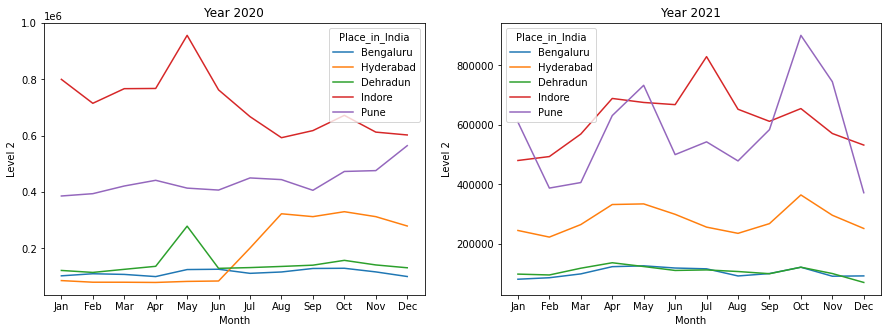

In [ ]:
# A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021. 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
year_2020 = df[df['Year']==2020]
plt.title("Year 2020")
sns.lineplot(data=year_2020,x = 'Month',y = 'Level 2',hue= 'Place_in_India',ci=None )

plt.subplot(1,2,2)
plt.title("Year 2021")
year_2021 = df[df['Year']==2021]
sns.lineplot(data=year_2021,x = 'Month',y = 'Level 2',hue= 'Place_in_India',ci=None )

plt.show()

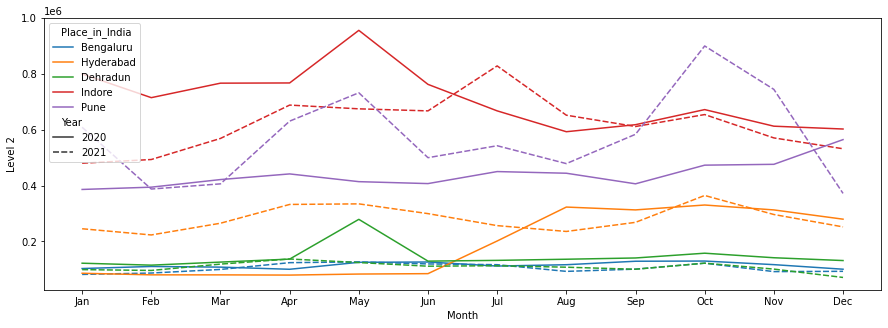

In [ ]:
plt.figure(figsize=(15,5))
year_20_21 = df[df['Year'].isin([2020,2021])]
sns.lineplot(data=year_20_21, x="Month",y="Level 2", hue="Place_in_India", style="Year",ci=None)

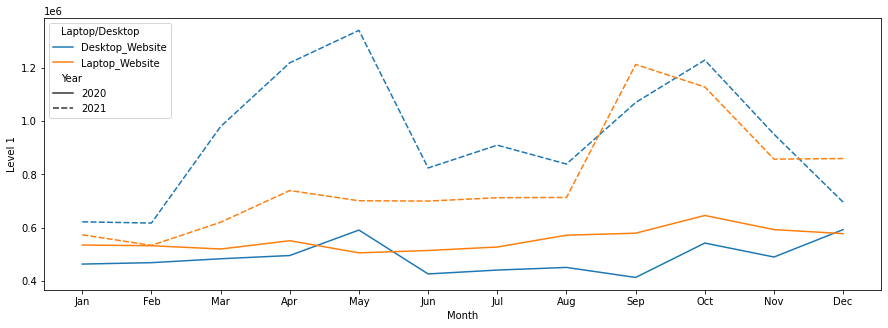

In [ ]:
# A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. 
plt.figure(figsize=(15,5))
year_20_21 = df[df['Year'].isin([2020,2021])]
sns.lineplot(data=year_20_21, x="Month",y="Level 1", hue="Laptop/Desktop", style="Year",ci=None)

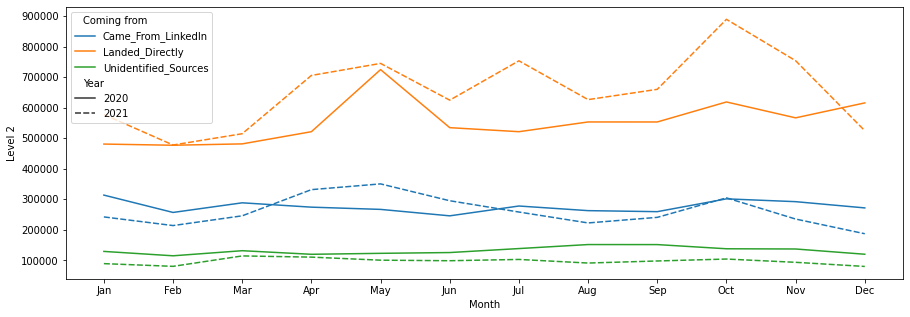

In [ ]:
# A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022.
plt.figure(figsize=(15,5))
year_21_22 = df[df['Year'].isin([2021,2022])]
sns.lineplot(data=year_20_21, x="Month",y="Level 2", hue="Coming from", style="Year",ci=None)

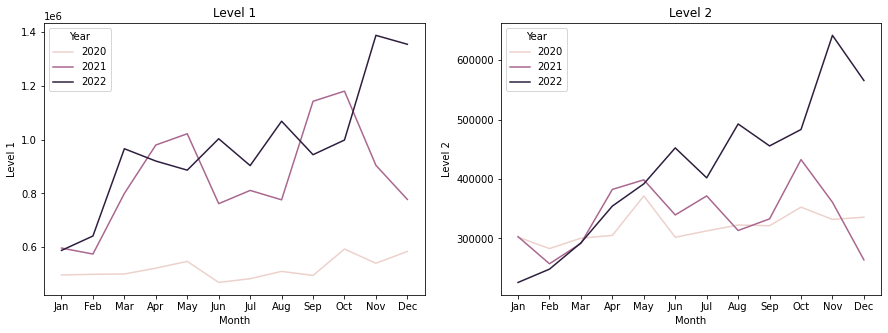

In [ ]:
# A line graph for “Level 1” and “Level 2” over the months of the year 2020, 2021 & 2022.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Level 1")
sns.lineplot(data = df, x="Month",y="Level 1", hue="Year",ci=None)

plt.subplot(1,2,2)
plt.title("Level 2")
sns.lineplot(data = df, x="Month",y="Level 2", hue="Year",ci=None)

plt.show()

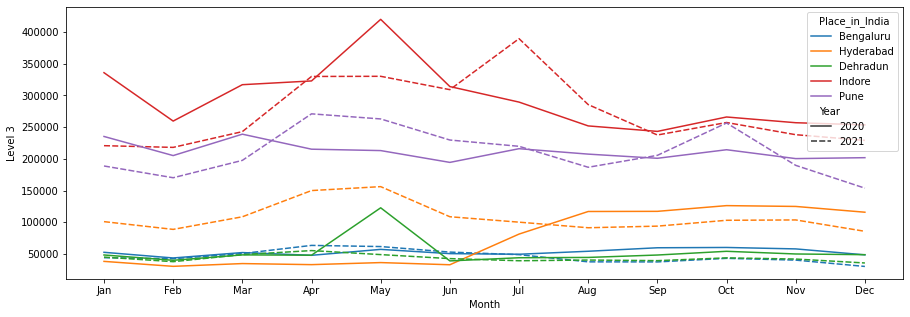

In [ ]:
# A line graph for “Level 3” foyearslace_in_India” over the months of the year 2020 and 2021.
plt.figure(figsize=(15,5))
year_20_21 = df[df['Year'].isin([2020,2021])]
sns.lineplot(data=year_20_21, x="Month",y="Level 3", hue="Place_in_India", style="Year",ci=None)

## Part 6: About the Previous projects
1. In this project I have made the bike rental system using python Opps concept which calculates the rentes of bikes accirding to which they have taken for how many days.https://github.com/Sanskrutii27/Bike-rental-system
2. In this project I extract information like :
What is the origin location of Rick Sanchez ?
List the names of all the episodes with a release date on or after 2014, in alphabetical order.
List the names and release years of all the episodes where Summer Smith is present, in chronological order.
List all characters created in 2017, in descending order by species. For characters with the same species, order them alphabetically by their name.
List the names of all characters present in S01E05
List the names of all characters present in an episode released in 2014.
Name the last location of Annie, from most recent episode.
List the names of all episodes in which both Jerry Smith and Summer Smith appeared.
List the names of all characters who appeared in an episode in which Amish Cyborg also appeared.
List top 5 characters with maximum number of episodes. Start from the highest.
What is the name of the episode with maximum number of characters
Link : https://github.com/Sanskrutii27/Rick-Morty-API-

I am work on Kaggle dataset also you can find the link below
Link : https://www.kaggle.com/sanskrutikunjir/code

## Part 7: Time management

I am Sanskruti Kunjir currently a student pursuing my bachelor degree in computer science. Even if I am a fresher and I do not sufficient skill I will try to complete my tasks regularly. If I get selected, I will set aside time from college and study and work in this internship. But I have university exams in next May month. Even though I will try my best !